In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


<ipython-input-2-1ea5c485b3af>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(class_counts, palette='viridis')


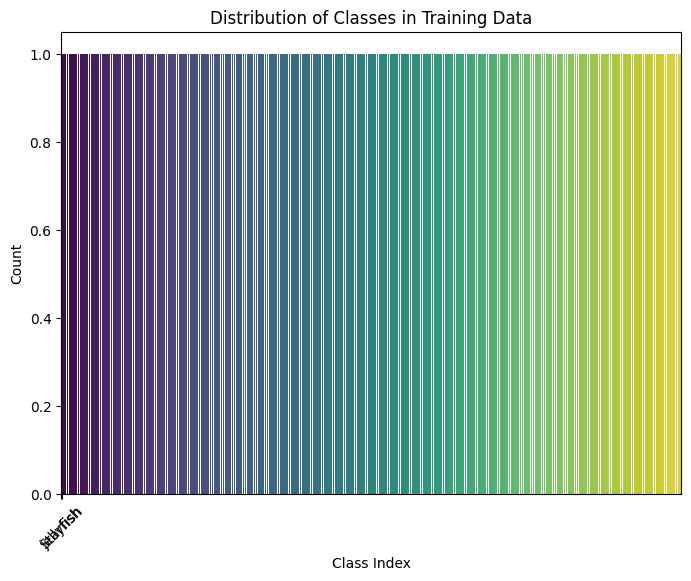

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 674s 9s/step - accuracy: 0.7554 - loss: 0.8869 - val_accuracy: 0.8814 - val_loss: 0.2728
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 253ms/step - accuracy: 0.8945 - loss: 0.2648 - val_accuracy: 0.9407 - val_loss: 0.1753
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.9333 - loss: 0.1838 - val_accuracy: 0.9322 - val_loss: 0.1653
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.9663 - loss: 0.1103 - val_accuracy: 0.9576 - val_loss: 0.1272
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - accuracy: 0.9827 - loss: 0.0737 - val_accuracy: 0.9534 - val_loss: 0.2150


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Perform EDA
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(class_counts, palette='viridis')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=45)
plt.show()

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Save the trained model
model.save('/content/drive/MyDrive/Msc-DS ojt_model.h5')


Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/5
67/67 [==============================] - 23s 295ms/step - loss: 0.5198 - accuracy: 0.8259 - val_loss: 0.1994 - val_accuracy: 0.9449
Epoch 2/5
67/67 [==============================] - 16s 245ms/step - loss: 0.2835 - accuracy: 0.8768 - val_loss: 0.1973 - val_accuracy: 0.9407
Epoch 3/5
67/67 [==============================] - 18s 270ms/step - loss: 0.2010 - accuracy: 0.9216 - val_loss: 0.1305 - val_accuracy: 0.9576
Epoch 4/5
67/67 [==============================] - 16s 244ms/step - loss: 0.1438 - accuracy: 0.9477 - val_loss: 0.1199 - val_accuracy: 0.9619
Epoch 5/5
7/7 [==============================] - 1s 165ms/step - loss: 0.1250 - accuracy: 0.9688
Validation Accuracy: 0.9688
7/7 [==============================] - 1s 164ms/step
Accuracy: 0.6830


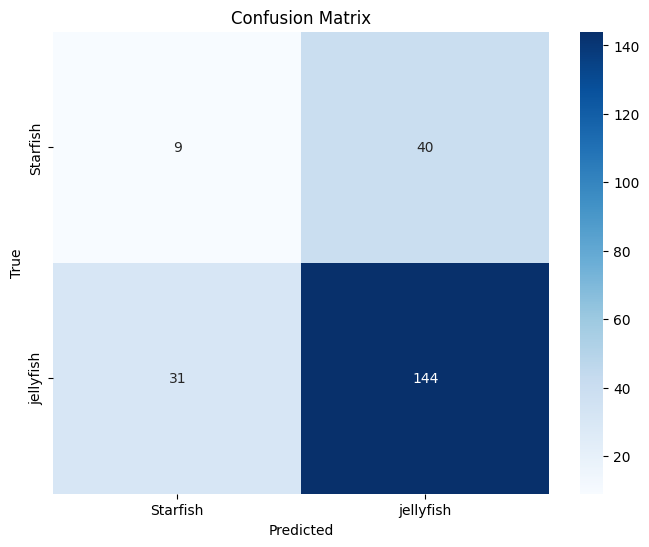

              precision    recall  f1-score   support

    Starfish       0.23      0.18      0.20        49
   jellyfish       0.78      0.82      0.80       175

    accuracy                           0.68       224
   macro avg       0.50      0.50      0.50       224
weighted avg       0.66      0.68      0.67       224



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model on the validation set
validation_steps = validation_generator.n // validation_generator.batch_size
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_steps)

print(f'Validation Accuracy: {val_acc:.4f}')

# Generate predictions
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes[:len(y_pred_classes)]  # Match the lengths

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


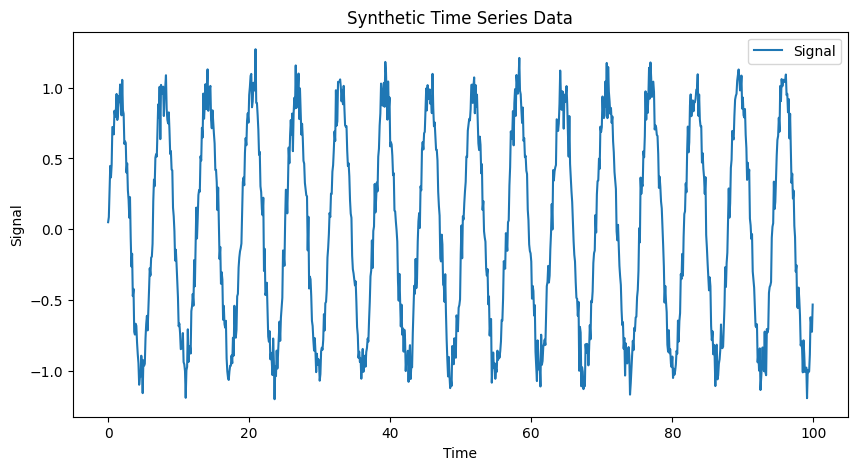

Summary Statistics:
              Time       Signal
count  1000.000000  1000.000000
mean     49.950000     0.003562
std      28.881944     0.713581
min       0.000000    -1.201790
25%      24.975000    -0.696470
50%      49.950000     0.018241
75%      74.925000     0.696202
max      99.900000     1.272431
Epoch 1/10
56/56 [==============================] - 4s 22ms/step - loss: 0.1153 - mae: 0.2529 - val_loss: 0.0513 - val_mae: 0.1796
Epoch 2/10
56/56 [==============================] - 1s 9ms/step - loss: 0.0492 - mae: 0.1766 - val_loss: 0.0493 - val_mae: 0.1753
Epoch 3/10
56/56 [==============================] - 1s 11ms/step - loss: 0.0486 - mae: 0.1759 - val_loss: 0.0489 - val_mae: 0.1747
Epoch 4/10
56/56 [==============================] - 1s 9ms/step - loss: 0.0485 - mae: 0.1757 - val_loss: 0.0488 - val_mae: 0.1757
Epoch 5/10
56/56 [==============================] - 0s 8ms/step - loss: 0.0484 - mae: 0.1755 - val_loss: 0.0487 - val_mae: 0.1751
Epoch 6/10
56/56 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


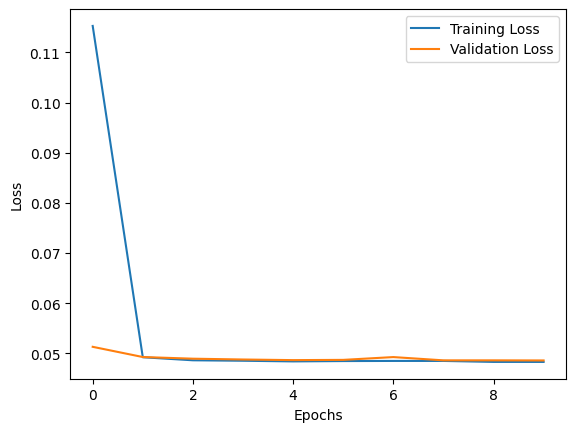

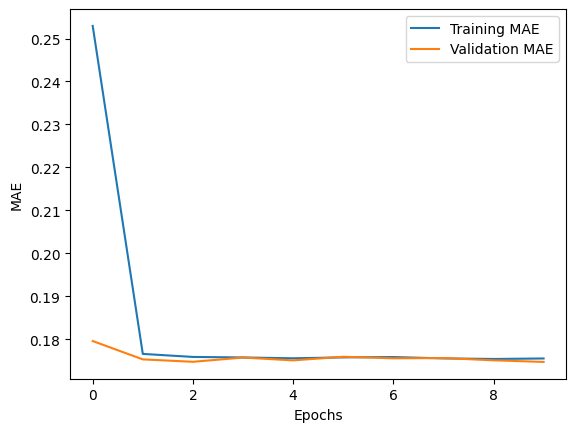

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 100, 0.1)
sin_wave = np.sin(time) + 0.1 * np.random.randn(len(time))

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'Signal': sin_wave})

# Visualize the time series data
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Signal'], label='Signal')
plt.title('Synthetic Time Series Data')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.show()

# Perform EDA on the time series data (you can add more as needed)
print("Summary Statistics:")
print(df.describe())

# Create sequences for training
sequence_length = 10
sequences = [df['Signal'].values[i:i+sequence_length] for i in range(len(df)-sequence_length)]

X = np.array(sequences[:-1])  # Features (input sequences)
y = np.array(sequences[1:])   # Targets (next values in the sequence)

# Reshape data for RNN input (batch_size, time_steps, input_features)
X = X.reshape(-1, sequence_length, 1)

# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)  # Output layer for regression
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Include MAE as a metric

# Train the RNN model with validation data
history = rnn_model.fit(X, y, epochs=10, batch_size=16, validation_split=0.1)

# Save the trained RNN model
rnn_model.save('/content/drive/MyDrive/Msc-DS ojt_rnn_model.h5')

# Access the history object to get information about the training process
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot the training and validation loss over epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation MAE over epochs
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



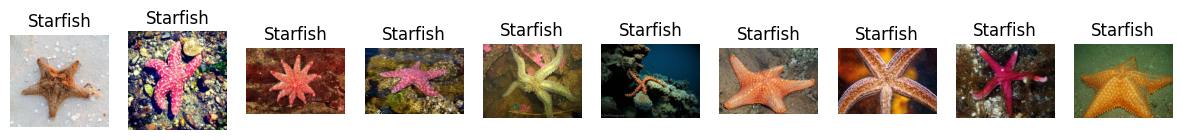

<Figure size 1500x500 with 0 Axes>

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the main folder
main_folder_path = '/content/drive/MyDrive/Msc-DS ojt'

# Subfolder names
subfolders = ['Starfish', 'jellyfish']

# Display a few images from each subfolder side by side
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)

    # Get the list of files in the subfolder
    file_list = [file_name for file_name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, file_name))]

    # Display the first few images
    num_images_to_display = 10
    plt.figure(figsize=(15, 5))  # Adjust the figure size based on the number of images

    for i in range(min(num_images_to_display, len(file_list))):
        img_path = os.path.join(subfolder_path, file_list[i])

        # Open the image using Pillow
        img = Image.open(img_path)

        # Display the image
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(subfolder)
        plt.axis('off')

    plt.show()


35363/35363 [==============================] - 0s 0us/step


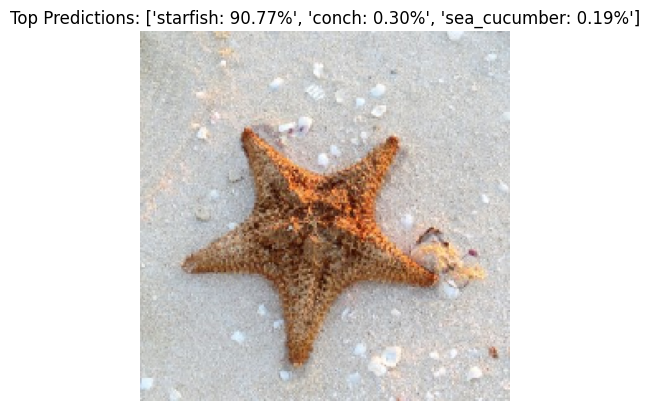

1/1 [==============================] - 0s 100ms/step


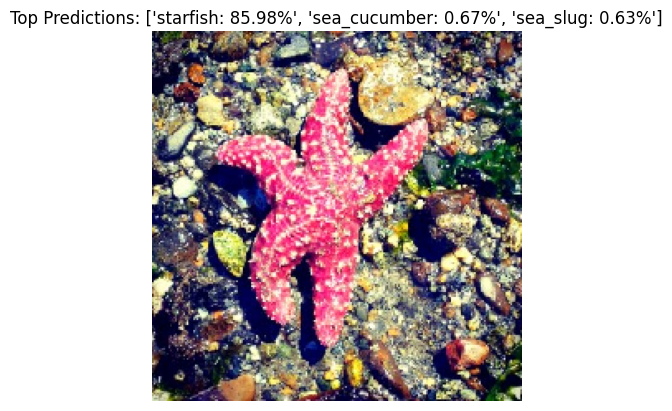

1/1 [==============================] - 0s 114ms/step


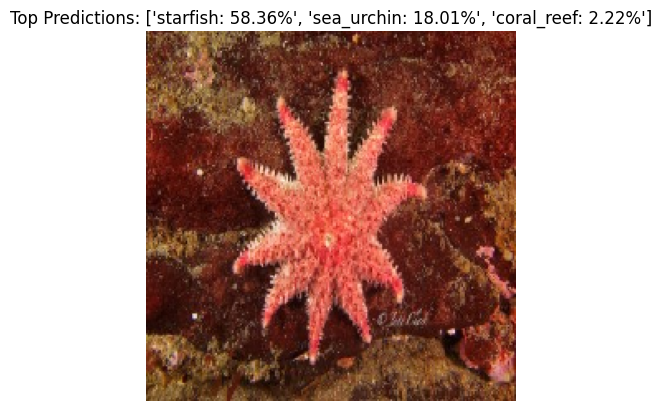

1/1 [==============================] - 0s 86ms/step


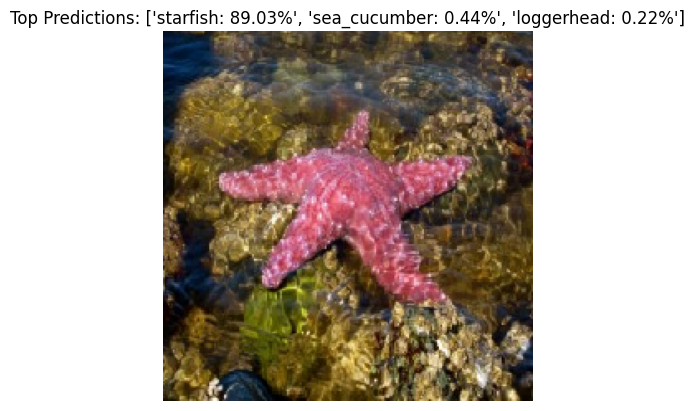

1/1 [==============================] - 0s 97ms/step


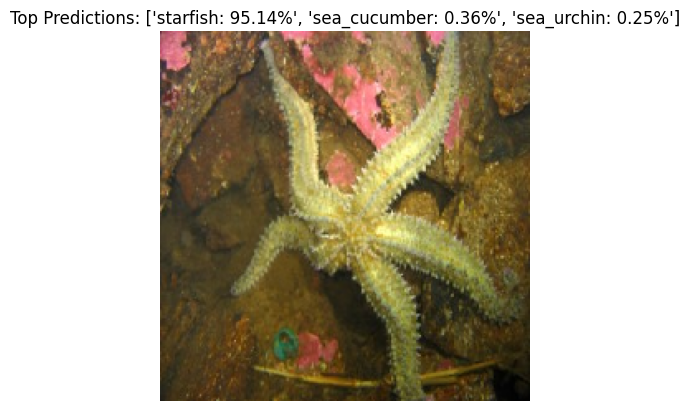

1/1 [==============================] - 0s 62ms/step


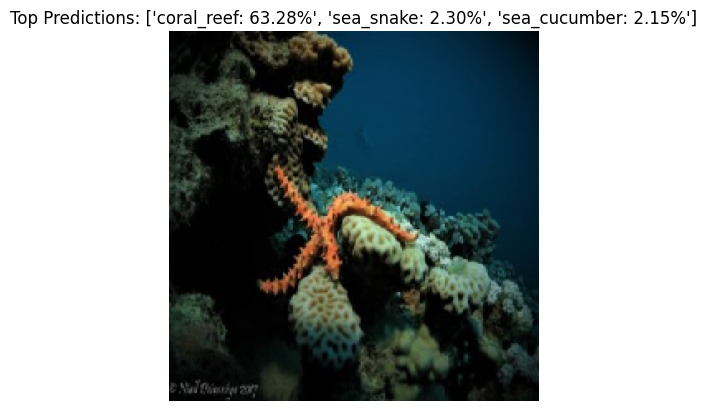

1/1 [==============================] - 0s 55ms/step


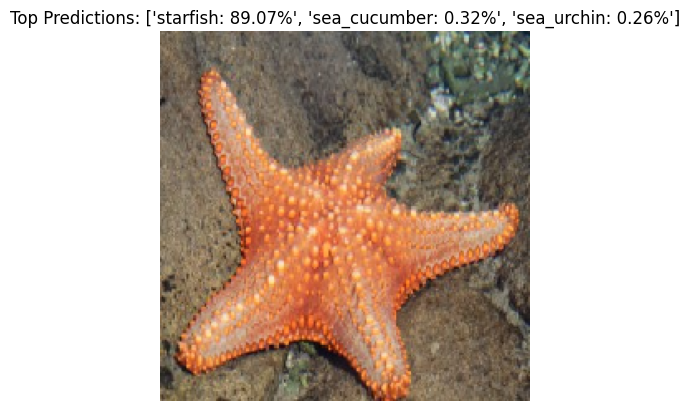

1/1 [==============================] - 0s 61ms/step


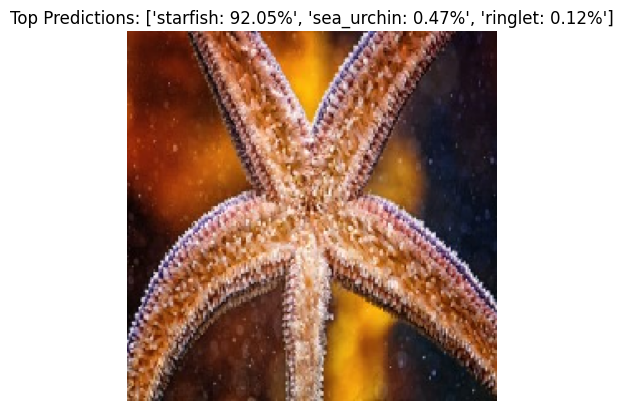

1/1 [==============================] - 0s 55ms/step


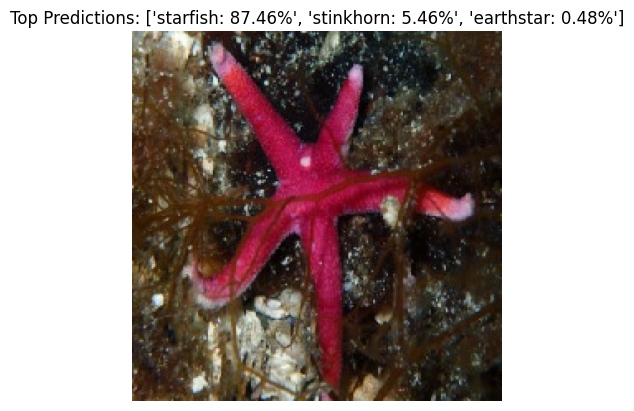

1/1 [==============================] - 0s 67ms/step


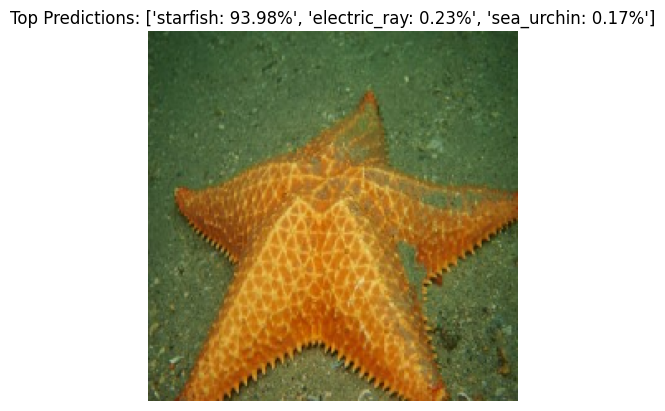

Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/mauve_stinger_jellyfish
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/compass_jellyfish
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/blue_jellyfish
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/Moon_jellyfish
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/Train_Test_Valid
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/lions_mane_jellyfish
Skipping directory: /content/drive/MyDrive/Msc-DS ojt/jellyfish/barrel_jellyfish


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Path to the main folder
main_folder_path = '/content/drive/MyDrive/Msc-DS ojt'

# Subfolder names
subfolders = ['Starfish', 'jellyfish']

# Load MobileNetV2 model
model_mobilenet = MobileNetV2(weights='imagenet')

# Function to predict and display results
def predict_and_display(image_path):
    try:
        # Check if the path is a file
        if os.path.isfile(image_path):
            # Load and resize the image
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Predictions
            predictions = model_mobilenet.predict(img_array)
            decoded_predictions = decode_predictions(predictions)

            # Display the image along with the top 3 predictions
            top_predictions = decoded_predictions[0][:3]
            plt.imshow(img)
            plt.title(f"Top Predictions: {[f'{label}: {score:.2%}' for (_, label, score) in top_predictions]}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Skipping directory: {image_path}")
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")

# Display predictions for a few images from each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)

    # Get the list of files in the subfolder
    file_list = os.listdir(subfolder_path)

    # Display predictions for the first few images
    num_images_to_display = 10
    for i in range(min(num_images_to_display, len(file_list))):
        img_path = os.path.join(subfolder_path, file_list[i])
        predict_and_display(img_path)



In [ ]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Build the CNN model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = base_model.output
x = Flatten()(x)
features_model = Model(inputs=base_model.input, outputs=x)

# Extract features using the trained CNN model
X_train_features = features_model.predict(train_generator)
X_val_features = features_model.predict(validation_generator)

# Flatten the features
X_train_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flat = X_val_features.reshape(X_val_features.shape[0], -1)

# Get the corresponding labels
y_train_knn = train_generator.classes
y_val_knn = validation_generator.classes

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_classifier.fit(X_train_flat, y_train_knn)

# Make predictions on the validation set
y_pred_knn = knn_classifier.predict(X_val_flat)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_val_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_val_knn, y_pred_knn)
classification_report_knn = classification_report(y_val_knn, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn:.4f}')
print('Confusion Matrix:\n', conf_matrix_knn)
print('Classification Report:\n', classification_report_knn)


Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


8/8 [==============================] - 79s 11s/step
KNN Accuracy: 0.7627
Confusion Matrix:
 [[  4  45]
 [ 11 176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.08      0.12        49
           1       0.80      0.94      0.86       187

    accuracy                           0.76       236
   macro avg       0.53      0.51      0.49       236
weighted avg       0.69      0.76      0.71       236



Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


8/8 [==============================] - 71s 10s/step
KNN Accuracy: 0.7415
Confusion Matrix:
 [[ 10  39]
 [ 22 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.20      0.25        49
           1       0.81      0.88      0.84       187

    accuracy                           0.74       236
   macro avg       0.56      0.54      0.55       236
weighted avg       0.71      0.74      0.72       236



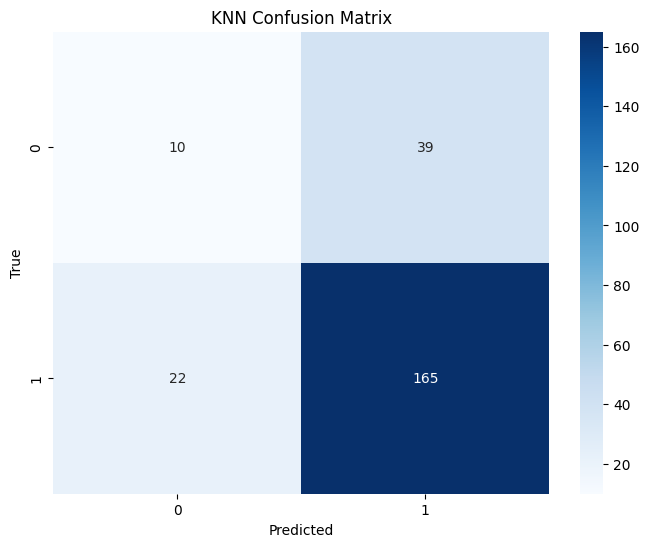

In [ ]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Build the CNN model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = base_model.output
x = Flatten()(x)
features_model = Model(inputs=base_model.input, outputs=x)

# Extract features using the trained CNN model
X_train_features = features_model.predict(train_generator)
X_val_features = features_model.predict(validation_generator)

# Flatten the features
X_train_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flat = X_val_features.reshape(X_val_features.shape[0], -1)

# Get the corresponding labels
y_train_knn = train_generator.classes
y_val_knn = validation_generator.classes

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_classifier.fit(X_train_flat, y_train_knn)

# Make predictions on the validation set
y_pred_knn = knn_classifier.predict(X_val_flat)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_val_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_val_knn, y_pred_knn)
classification_report_knn = classification_report(y_val_knn, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn:.4f}')
print('Confusion Matrix:\n', conf_matrix_knn)
print('Classification Report:\n', classification_report_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/5
67/67 [==============================] - 1005s 15s/step - loss: 0.4047 - accuracy: 0.8403 - val_loss: 0.3049 - val_accuracy: 0.8856
Epoch 2/5
67/67 [==============================] - 18s 261ms/step - loss: 0.2336 - accuracy: 0.9048 - val_loss: 0.1206 - val_accuracy: 0.9534
Epoch 3/5
67/67 [==============================] - 16s 241ms/step - loss: 0.1691 - accuracy: 0.9346 - val_loss: 0.2702 - val_accuracy: 0.9153
Epoch 4/5
67/67 [==============================] - 16s 231ms/step - loss: 0.1039 - accuracy: 0.9636 - val_loss: 0.1724 - val_accuracy: 0.9576
Epoch 5/5
67/67 [==============================] - 15s 230ms/step - loss: 0.0551 - accuracy: 0.9865 - val_loss: 0.1394 - val_accuracy: 0.9661


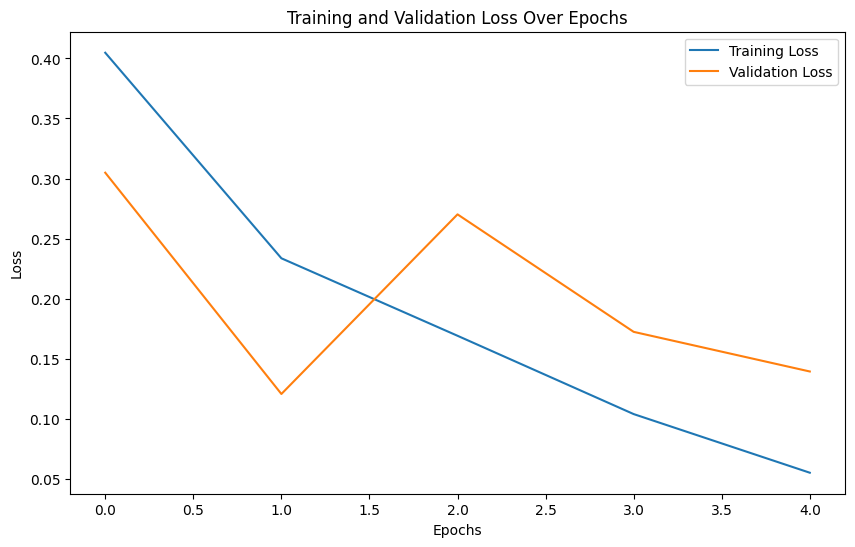

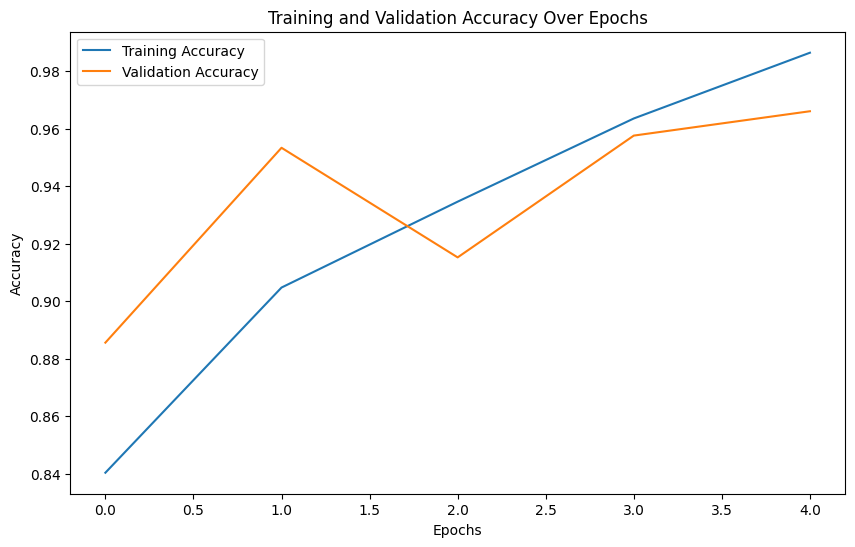

7/7 [==============================] - 1s 186ms/step - loss: 0.1458 - accuracy: 0.9643
Validation Accuracy: 0.9643
7/7 [==============================] - 1s 186ms/step


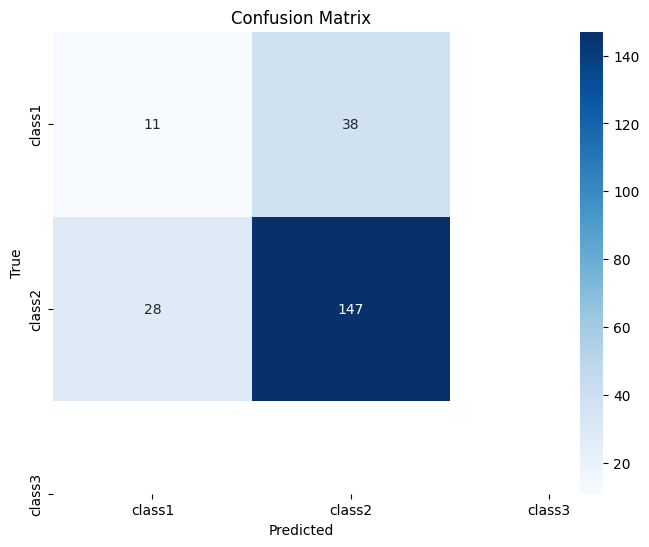

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define class labels (replace with your actual class labels)
class_labels = ['class1', 'class2', 'class3']

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_steps = validation_generator.n // validation_generator.batch_size
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_steps)

print(f'Validation Accuracy: {val_acc:.4f}')

# Generate predictions
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes[:len(y_pred_classes)]  # Match the lengths

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Found 2142 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/5
67/67 [==============================] - 24s 319ms/step - loss: 0.4876 - accuracy: 0.8039 - val_loss: 0.2532 - val_accuracy: 0.8771
Epoch 2/5
67/67 [==============================] - 19s 284ms/step - loss: 0.2922 - accuracy: 0.8702 - val_loss: 0.1765 - val_accuracy: 0.9449
Epoch 3/5
67/67 [==============================] - 19s 284ms/step - loss: 0.2232 - accuracy: 0.9113 - val_loss: 0.1763 - val_accuracy: 0.9407
Epoch 4/5
67/67 [==============================] - 19s 285ms/step - loss: 0.1947 - accuracy: 0.9239 - val_loss: 0.3330 - val_accuracy: 0.8983
Epoch 5/5
67/67 [==============================] - 18s 267ms/step - loss: 0.1527 - accuracy: 0.9454 - val_loss: 0.1696 - val_accuracy: 0.9407


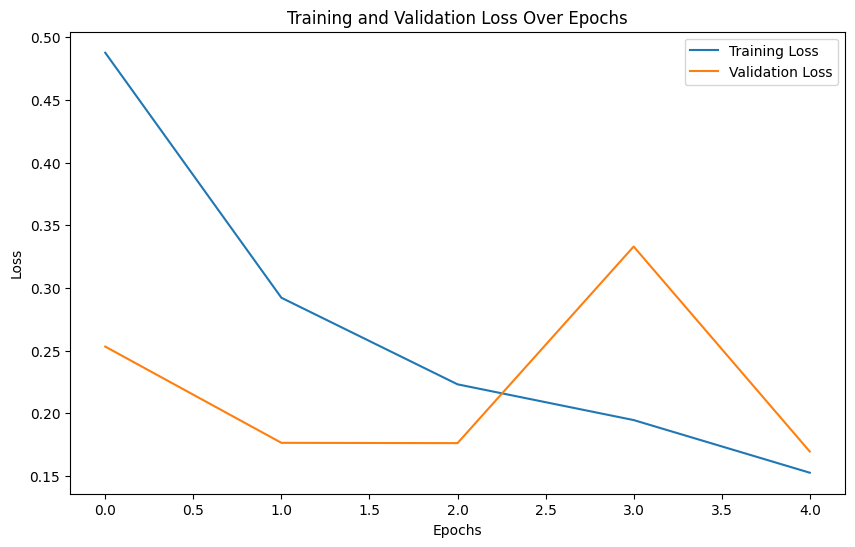

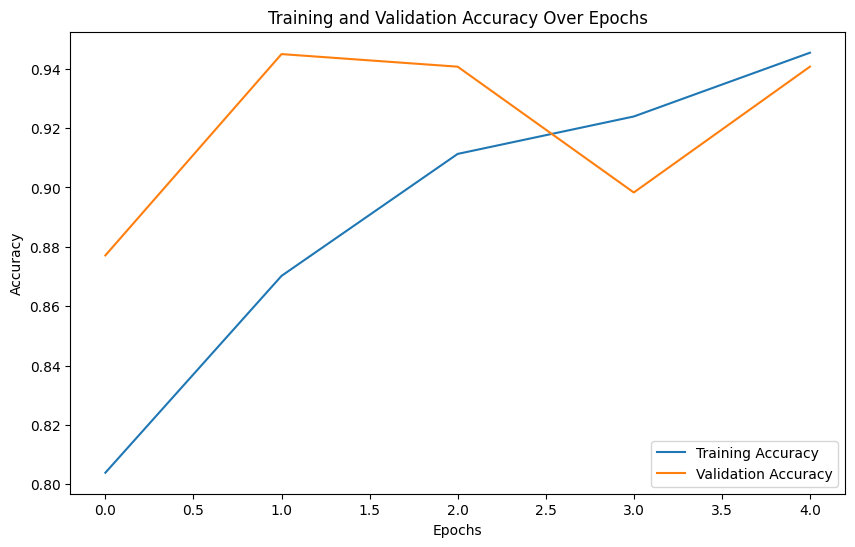

7/7 [==============================] - 1s 172ms/step - loss: 0.1589 - accuracy: 0.9420
Validation Accuracy: 0.9420
7/7 [==============================] - 1s 181ms/step


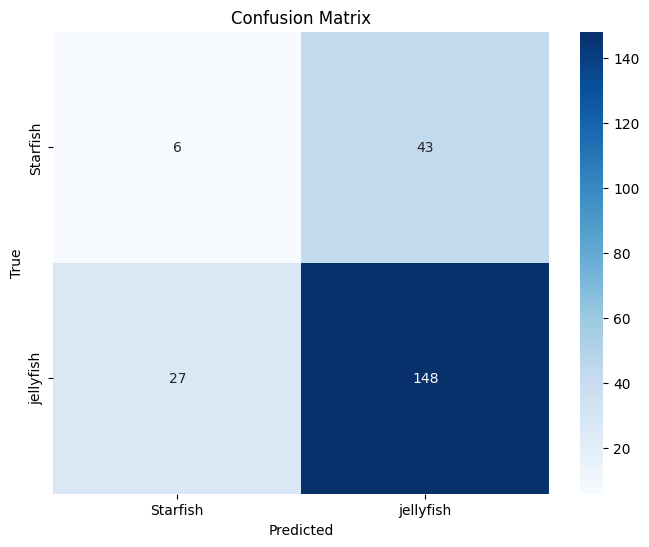

Classification Report:
               precision    recall  f1-score   support

    Starfish       0.18      0.12      0.15        49
   jellyfish       0.77      0.85      0.81       175

    accuracy                           0.69       224
   macro avg       0.48      0.48      0.48       224
weighted avg       0.65      0.69      0.66       224



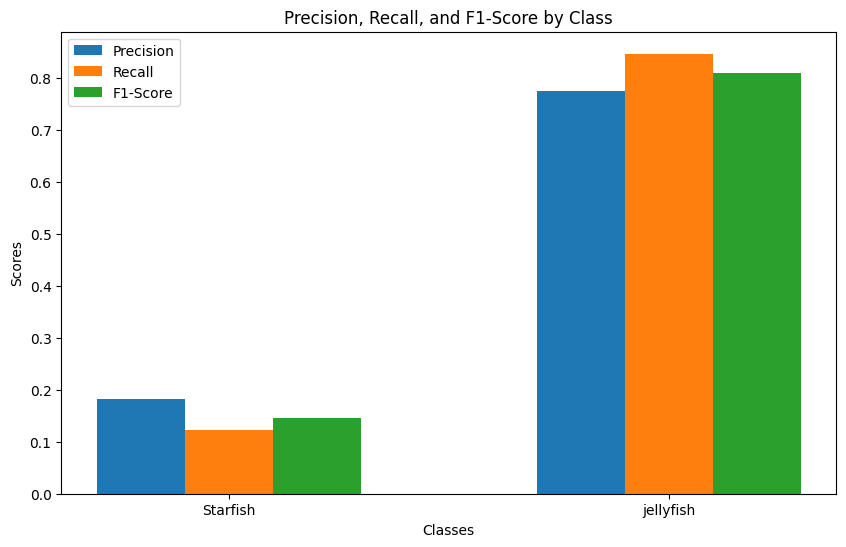

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define paths
train_path = '/content/drive/MyDrive/Msc-DS ojt'

# Get class labels dynamically
class_labels = sorted(os.listdir(train_path))

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='training'
)

# Validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')  # Output layer with softmax for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_steps = validation_generator.n // validation_generator.batch_size
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_steps)

print(f'Validation Accuracy: {val_acc:.4f}')

# Generate predictions
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes[:len(y_pred_classes)]  # Match the lengths

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", class_report)

# Extract precision, recall, and F1-score for each class
report_dict = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
precision = [report_dict[label]['precision'] for label in class_labels]
recall = [report_dict[label]['recall'] for label in class_labels]
f1_score = [report_dict[label]['f1-score'] for label in class_labels]

# Plot bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_labels))

plt.bar(index, precision, bar_width, label='Precision')
plt.bar(index + bar_width, recall, bar_width, label='Recall')
plt.bar(index + 2*bar_width, f1_score, bar_width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(index + bar_width, class_labels)
plt.legend()
plt.show()
